## TF-IDF MODEL example model configuration

In [83]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer

In [84]:
seed = 495

In [88]:
#Load the actual data
path_to_data = ""
df_exp = pd.read_csv(path_to_data)
df_exp.shape

(4199, 19)

In [89]:
df_exp.set_index("ecli", inplace=True)
df_exp.shape

(4198, 18)

In [90]:
#Load the featurized representation of the data, using one of the feature_extraction scripts
path_to_bow_model = ""
count_vector_df = pd.read_csv("C:/Users/julia/Documents/DSS_Thesis_project_datasets/GPU_results/tfidf_count_vector.csv")
count_vector_df.shape

(4198, 46318)

In [91]:
count_vector_df.set_index("ecli", inplace=True)
count_vector_df.head()

,aaw,wao,toepass,artikel,beroepswet,algemen,wet,bestuursrecht,kost,geding,...,voorspelbaarheidsvereist,darmstadt,markeloseweg,holt,rijlijn,laserapparat,cosinuseffect,validiteit,jep,renegad
ecli,,,,,,,,,,,,,,,,,,,,,
ECLI:NL:CRVB:2005:AU8831,5.0,7.0,4.0,6.0,2.0,3.0,7.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ECLI:NL:RVS:2018:124,NaN,NaN,8.0,44.0,NaN,21.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ECLI:NL:RBALM:2001:AD8348,NaN,NaN,7.0,17.0,NaN,3.0,3.0,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ECLI:NL:CRVB:2009:BH1591,NaN,6.0,2.0,4.0,NaN,2.0,2.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ECLI:NL:CRVB:2008:BF2240,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Part 2: TF-IDF Vectorization**

In [92]:
# Fill NaN values with 0 (if any)
count_vector_df = count_vector_df.fillna(0)

# Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(count_vector_df)

# Convert the TF-IDF matrix to a DataFrame if needed
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vector_df.columns)

# Display the updated DataFrame with TF-IDF vectors
tfidf_df.shape

c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\s

(4198, 46317)

**Part 2.5: Hyperparameter tuning**
<br>Section to perform optional hyperparameter tuning. Here, hyperparameter tuning is done for the K-means algorithm

In [ ]:
# Performing necessary imports
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import davies_bouldin_score
from average_entropy_metric import average_entropy
from sklearn.metrics import silhouette_score

from tqdm import tqdm

In [ ]:
# Load the validation dataset
df_sample_dataset = # sample of the complete dataset
df_bow_dataset = # sample of the bow_model, created with the sample dataset

In [ ]:
# Fill NaN values with 0 (if any)
df_bow_dataset = df_bow_dataset.fillna(0)

# Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
tfidf_matrix_hyper = tfidf_transformer.fit_transform(df_bow_dataset)

In [17]:
# Define the hyperparameter values
pca_dimensions = [5, 10, 15, 25, 50]  #0 means no PCA
k_values = [3, 4, 5]


In [19]:
#Create a list to store results
result_list = []

# Loop through hyperparameter values
for pca_dim in tqdm(pca_dimensions, desc="PCA Dimensions"):
    # Apply PCA if dimension > 0
    if pca_dim > 0:
        pca = PCA(n_components=pca_dim)
        tfidf_matrix_pca = pca.fit_transform(tfidf_matrix_hyper.toarray())
    else:
        tfidf_matrix_pca = tfidf_matrix_hyper.toarray()

    for k in k_values:
        # Perform K-Means clustering
        kmeans = KMeans(n_clusters=k, random_state=seed, init='k-means++', n_init=10)
        cluster_labels = kmeans.fit_predict(tfidf_matrix_pca)

        df_sample_dataset["CLUSTER"] = cluster_labels

        # Calculate metrics
        Silhouette_score = silhouette_score(tfidf_matrix_pca, cluster_labels)
        DB_index = davies_bouldin_score(tfidf_matrix_pca, cluster_labels)
        Average_entropy = average_entropy(df_sample_dataset)

        # Append results to the DataFrame
        result_list.append({
            'PCA_Dimensions': pca_dim,
            'K_Value': k,
            'Silhouette_score': Silhouette_score,
            'DB_index': DB_index,
            'Average_entropy': Average_entropy
        })

results_df = pd.DataFrame(result_list)


PCA Dimensions:   0%|          | 0/9 [00:00<?, ?it/s]c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
PCA Dimensions:  11%|█         | 1/9 [00:29<03:58, 29.78s/it]c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureW

In [21]:
# Display the results
results_df.round(4)

,PCA_Dimensions,K_Value,Silhouette_score,DB_index,Average_entropy
0,0,3,0.0378,4.0183,0.4050
1,0,4,0.0535,3.4205,0.2950
2,0,5,0.0581,4.3417,0.2047
3,5,3,0.5634,0.5097,0.4021
4,5,4,0.5426,0.5797,0.2945
5,5,5,0.5415,0.5973,0.2153
6,10,3,0.4029,0.6844,0.4038
7,10,4,0.3447,0.8629,0.2957
8,10,5,0.3791,1.0153,0.2251
9,15,3,0.3286,0.8206,0.4021


**Part 3:   Dimensionality reduction**

In [93]:
# Performing necessary imports
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca_embeddings = pca.fit_transform(tfidf_matrix.toarray())
pca_embeddings.shape

(4198, 5)

**Part 4.1:   K-Means Clustering**

In [94]:
# Performing necessary imports
from sklearn.cluster import KMeans

k = 5

kmeans = KMeans(n_clusters=k, random_state=seed, n_init=10)
clusters = kmeans.fit_predict(pca_embeddings)

# Add the 'Cluster' column to the original DataFrame
df_exp['CLUSTER'] = clusters

# Display the updated DataFrame with cluster assignments
df_exp[['full_text', 'CLUSTER', 'subject']].head()

,full_text,CLUSTER,subject
ecli,,,
ECLI:NL:CRVB:2005:AU8831,03/1565 AAW/WAO + 1568 WAO U I T S P R A A ...,1,Bestuursrecht
ECLI:NL:RVS:2018:124,201704283/1/A2. Datum uitspraak: 17 januari ...,1,Bestuursrecht
ECLI:NL:RBALM:2001:AD8348,ARRONDISSEMENTSRECHTBANK ALMELO Sector Bestu...,1,Bestuursrecht
ECLI:NL:CRVB:2009:BH1591,08/2488 WAO 08/6669 WAO Centrale Raad van ...,4,Bestuursrecht
ECLI:NL:CRVB:2008:BF2240,02/4466 AOW Centrale Raad van Beroep Meervo...,4,Bestuursrecht


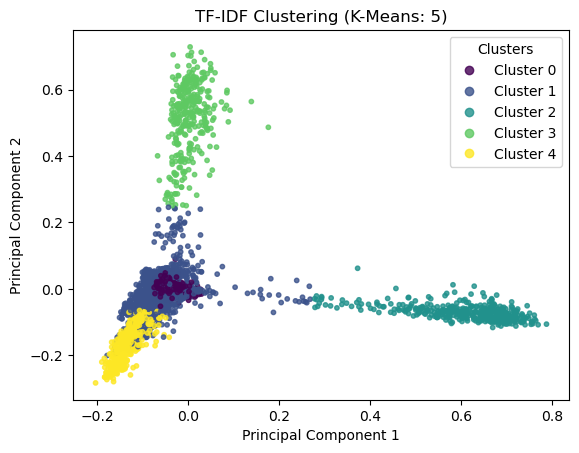

In [95]:
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Add the reduced features to the DataFrame
df_exp['PCA1'] = reduced_features[:, 0]
df_exp['PCA2'] = reduced_features[:, 1]

# Define cluster labels for the legend
cluster_labels = [f'Cluster {i}' for i in range(k)]

# Visualize the clusters
scatter = plt.scatter(df_exp['PCA1'], df_exp['PCA2'], c=df_exp['CLUSTER'], cmap='viridis', alpha=0.8, s=10)
plt.title('TF-IDF Clustering (K-Means: 5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(handles=scatter.legend_elements()[0], labels=cluster_labels, title='Clusters')

plt.show()

**Part 5:   Final Evaluation**

In [13]:
from sklearn.metrics import silhouette_score

# compute the average silhouette score for the entire dataset
# note, to obtain a silhoutte score for individual samples, use silhouette_samples()
silhouette_avg = silhouette_score(pca_embeddings, clusters)
round(silhouette_avg, 4)

0.5854

In [14]:
# Davies-Bouldin Index
# The Davies-Bouldin index measures the compactness and separation of clusters. A lower Davies-Bouldin index indicates better clustering.
# The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.
# The minimum score is zero, with lower values indicating better clustering.
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(pca_embeddings, clusters)
round(db_index, 4)

0.5316

In [15]:
from average_entropy_metric import average_entropy

result = average_entropy(df_exp)
print("(Weighted) average entropy: ", result)

(Weighted) average entropy:  0.2232536856846546


In [20]:
# Creating a cross-tabulation to get an idea of how unique the clusters are
ct = pd.crosstab(df_exp["CLUSTER"], df_exp["main_subject"])
ct

main_subject,Bestuursrecht,Civiel recht,Internationaal publiekrecht,Strafrecht
CLUSTER,,,,
0,128,1,0,77
1,865,1598,18,216
2,0,0,132,287
3,0,0,0,319
4,337,217,3,0


**Part 6:   Cluster representation**

In [37]:
### STEP 1: transform each cluster into a large bag-of-words. That is, the individual bag-of-words for all documents in a single cluster are concatenated
full_bow_model = count_vector_df.copy()
if len(clusters) == len(full_bow_model):
    full_bow_model["CLUSTER"] = clusters
    cluster_bow = full_bow_model.groupby('CLUSTER').sum()
else:
    print("ERROR MESSAGE: number of clusters does not align with the number of documents in count_vector_df")

if cluster_bow.shape[0] != k:
    print("ERROR MESSAGE: the number of rows should be equal to the number of clusters!")

if cluster_bow.shape[1] != count_vector_df.shape[1]:
    print("ERROR MESSAGE: the number of columns (i.e., strings) should be equal!")

cluster_bow.shape

(5, 46317)

In [30]:
from _cf_idf_transformer import ClassTfidfTransformer

# Fill NaN values with 0 (if any)
cluster_BoW = cluster_bow.fillna(0)

#Apply the TF-IDF transformation to the BoW model
c_tfidf_transformer = ClassTfidfTransformer()
c_tfidf_matrix = c_tfidf_transformer.fit_transform(cluster_BoW)

# Convert the TF-IDF matrix to a DataFrame if needed
c_tfidf_df = pd.DataFrame(c_tfidf_matrix, columns=cluster_BoW.columns)

# Display the updated DataFrame with TF-IDF vectors
c_tfidf_df.shape

c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\julia\anaconda3\envs\DSS_Thesis_project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated

(5, 46317)

In [31]:
# Display the top N words for each cluster for the chosen model
number_of_top_words = 10

for index, row in c_tfidf_df.iterrows():
    top_values = row.nlargest(number_of_top_words)
    top_words = top_values.index.tolist()

    print(f"Cluster {index}:    ", end= " ")
    print(top_words)
    print()

Cluster 0:     ['betrok', 'kantonrechter', 'beroep', 'officier', 'besliss', 'justitie', 'gemachtigd', 'gedrag', 'wahv', 'beroepschrift']

Cluster 1:     ['eiser', 'rechtbank', 'artikel', 'partij', 'gedaagd', 'eiseres', 'verweerder', 'beroep', 'zak', 'grond']

Cluster 2:     ['opgeeist', 'person', 'overlever', 'eab', 'olw', 'rechtbank', 'artikel', 'feit', 'the', 'justitie']

Cluster 3:     ['verdacht', 'slachtoffer', 'medeverdacht', 'feit', 'benadeeld', 'rechtbank', 'bewez', 'gelegd', 'last', 'strafbar']

Cluster 4:     ['appellant', 'geintimeerd', 'beroep', 'hoger', 'hof', 'uitsprak', 'besluit', 'rad', 'artikel', 'rechtbank']

